In [1]:
# Imports
import random
import string
import tempfile
import shutil
import subprocess as sp
import os

from PIL import Image
from torch import nn as nn
from torch import Generator
from torch.utils.data import random_split,DataLoader
# TODO: Currently assumes that pytest runs from project root
from util.car_dataset import check_dir, check_file, CarDataset, DatasetError
from networks.common import *
from networks.CNNbase import CNNBasic

In [2]:
# Helper Functions
def rand_string(length=5):
    return ''.join(random.choices(string.ascii_letters +
        string.digits, k=length))

def loaded_dataset(temp_dir):
    '''
    Loads the car_dataset and returns the CarDataset object.
    '''
    image_folder_list = ['0_Frames','1_Frames','2_Frames','3_Frames']
    label_file_list = ['0.txt','1.txt','2.txt','3.txt']
    #image_folder_list = ['0_Frames']
    #label_file_list = ['0.txt']
    car_data = CarDataset(temp_dir,image_folder_list,label_file_list)
    car_data.drop_nan()

    return car_data

def dataset_loader(loaded_dataset):
    length = len(loaded_dataset)
    split_set = random_split(loaded_dataset,[round(0.80*length)
                ,round(0.20*length)],generator=Generator().manual_seed(42))
    train_loader = DataLoader(split_set[0],batch_size=20)
    test_loader = DataLoader(split_set[1],batch_size=20)
    '''
    Lowering values to sane levels to help run tests on github
    runners. Ideally on local GPU (4GB) 80/20 split with batch size of
    30 works well.
    '''
    return (train_loader,test_loader)

def network(alpha=0):
    network = CNNBasic(alpha)
    network = network.to(get_device())
    network.double()
    return network

In [4]:
root = os.getcwd()
print(os.getcwd())

/home/akshay.viswakumar/dl-based-sensor-calib


In [5]:
# Load Data
data = loaded_dataset(os.path.join(root,"dummy"))

In [6]:
# Split Dataset
datasets = dataset_loader(data)

In [7]:
# Initialize Network
net = network(alpha=0)

In [9]:
# Set Up Paths and Metadata for Storing Values
test_name = "Baseline"
checkpoint_path = os.path.join(root,"Test-Results",test_name)

In [10]:
# Train
train = datasets[0]
test = datasets[1]
print("Start Training")
losses = run_training(net,train,test,21,get_device(),checkpoint_path,test_name,checkpoint_freq=5)

0it [00:00, ?it/s]

Start Training


149it [02:13,  1.12it/s]
0it [00:00, ?it/s]

Num = 38
Len = 742
Test Set Average Loss 0.000186
Train Epoch: 0	Train Loss: 0.000602 Test Loss:0.000186


149it [02:14,  1.11it/s]
0it [00:00, ?it/s]

Num = 38
Len = 742
Test Set Average Loss 0.000120
Train Epoch: 1	Train Loss: 0.000352 Test Loss:0.000120


149it [02:12,  1.12it/s]
0it [00:00, ?it/s]

Num = 38
Len = 742
Test Set Average Loss 0.000101
Train Epoch: 2	Train Loss: 0.000281 Test Loss:0.000101


149it [02:13,  1.11it/s]
0it [00:00, ?it/s]

Num = 38
Len = 742
Test Set Average Loss 0.000081
Train Epoch: 3	Train Loss: 0.000231 Test Loss:0.000081


149it [02:13,  1.12it/s]
0it [00:00, ?it/s]

Num = 38
Len = 742
Test Set Average Loss 0.000075
Train Epoch: 4	Train Loss: 0.000209 Test Loss:0.000075


149it [02:13,  1.12it/s]
0it [00:00, ?it/s]

Num = 38
Len = 742
Test Set Average Loss 0.000066
Train Epoch: 5	Train Loss: 0.000188 Test Loss:0.000066


149it [02:13,  1.11it/s]
0it [00:00, ?it/s]

Num = 38
Len = 742
Test Set Average Loss 0.000065
Train Epoch: 6	Train Loss: 0.000173 Test Loss:0.000065


149it [02:13,  1.11it/s]
0it [00:00, ?it/s]

Num = 38
Len = 742
Test Set Average Loss 0.000060
Train Epoch: 7	Train Loss: 0.000160 Test Loss:0.000060


149it [02:14,  1.11it/s]
0it [00:00, ?it/s]

Num = 38
Len = 742
Test Set Average Loss 0.000058
Train Epoch: 8	Train Loss: 0.000153 Test Loss:0.000058


149it [02:14,  1.11it/s]
0it [00:00, ?it/s]

Num = 38
Len = 742
Test Set Average Loss 0.000055
Train Epoch: 9	Train Loss: 0.000144 Test Loss:0.000055


149it [02:13,  1.11it/s]
0it [00:00, ?it/s]

Num = 38
Len = 742
Test Set Average Loss 0.000054
Train Epoch: 10	Train Loss: 0.000136 Test Loss:0.000054


149it [02:15,  1.10it/s]
0it [00:00, ?it/s]

Num = 38
Len = 742
Test Set Average Loss 0.000050
Train Epoch: 11	Train Loss: 0.000132 Test Loss:0.000050


149it [02:15,  1.10it/s]
0it [00:00, ?it/s]

Num = 38
Len = 742
Test Set Average Loss 0.000048
Train Epoch: 12	Train Loss: 0.000123 Test Loss:0.000048


149it [02:15,  1.10it/s]
0it [00:00, ?it/s]

Num = 38
Len = 742
Test Set Average Loss 0.000049
Train Epoch: 13	Train Loss: 0.000115 Test Loss:0.000049


149it [02:15,  1.10it/s]
0it [00:00, ?it/s]

Num = 38
Len = 742
Test Set Average Loss 0.000045
Train Epoch: 14	Train Loss: 0.000118 Test Loss:0.000045


149it [02:12,  1.12it/s]
0it [00:00, ?it/s]

Num = 38
Len = 742
Test Set Average Loss 0.000044
Train Epoch: 15	Train Loss: 0.000115 Test Loss:0.000044


149it [02:12,  1.13it/s]
0it [00:00, ?it/s]

Num = 38
Len = 742
Test Set Average Loss 0.000044
Train Epoch: 16	Train Loss: 0.000109 Test Loss:0.000044


149it [02:12,  1.12it/s]
0it [00:00, ?it/s]

Num = 38
Len = 742
Test Set Average Loss 0.000041
Train Epoch: 17	Train Loss: 0.000104 Test Loss:0.000041


149it [02:12,  1.12it/s]
0it [00:00, ?it/s]

Num = 38
Len = 742
Test Set Average Loss 0.000040
Train Epoch: 18	Train Loss: 0.000102 Test Loss:0.000040


149it [02:12,  1.12it/s]
0it [00:00, ?it/s]

Num = 38
Len = 742
Test Set Average Loss 0.000039
Train Epoch: 19	Train Loss: 0.000099 Test Loss:0.000039


149it [02:12,  1.12it/s]


Num = 38
Len = 742
Test Set Average Loss 0.000039
Train Epoch: 20	Train Loss: 0.000097 Test Loss:0.000039


In [11]:
# Save Loss Files
save_stats(losses[0],os.path.join(checkpoint_path,'train_loss.pkl')) # Train loss
save_stats(losses[1],os.path.join(checkpoint_path,'test_loss.pkl')) # Test Loss

In [12]:
import matplotlib.pyplot as plt

def plot_losses(test,train):
    plt.figure()
    plt.grid()
    plt.plot(train,label='train')
    plt.plot(test,label='test')
    plt.legend()

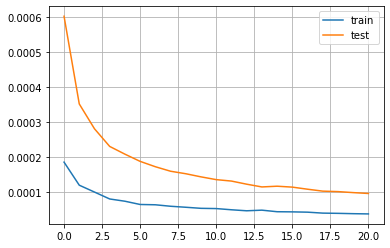

In [13]:
plot_losses(losses[0],losses[1])

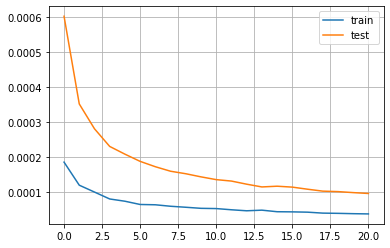

In [14]:
# Just a Backup Test
plot_losses(load_stats(os.path.join(checkpoint_path,'train_loss.pkl')),load_stats(os.path.join(checkpoint_path,'test_loss.pkl')))